# Demo: ANOVA ONEWAY - LÀM SẢN PHẨM

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_excel("dataset.xlsx",sheet_name="Groups")

In [3]:
data

,Group 1,Group 2,Group 3
0,3,4,9
1,1,3,7
2,3,5,8
3,2,5,11
4,4,4,9


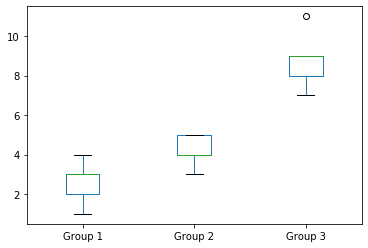

In [4]:
data.boxplot(column=['Group 1', 'Group 2', 'Group 3'], grid=False)

### Bước 1: Kiểm tra tính đồng nhất của phương sai

In [5]:
import scipy.stats as stats
w, pvalue = stats.levene(data['Group 1'], data['Group 2'], data['Group 3'])
print(w, pvalue)

0.30000000000000004 0.746215396636628


- Với p= 0.74 (>>0.05): Chấp nhận Ho: Null hypothesis: các mẫu từ các quần thể có phương sai bằng nhau.
- =>Đủ điều kiện để phân tích tiếp ANOVA

### Bước 2: ANOVA test

In [6]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns F and P-value
fvalue, pvalue = stats.f_oneway(data['Group 1'], data['Group 2'], data['Group 3'])
print(fvalue, pvalue)

36.99999999999997 7.3806866712679715e-06


- Với giá trị p << 0.05 và fvalue >> 3.8 => Bác bỏ Ho => Chấp nhận Ha: Có sự khác biệt đáng kể giữa các nhóm

In [7]:
# Kiểm tra sự khác biệt giữa các nhóm
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols
# reshape the d dataframe suitable for statsmodels package 
d_melt = pd.melt(data.reset_index(), id_vars=['index'], value_vars=['Group 1', 'Group 2', 'Group 3'])
# replace column names
d_melt.columns = ['index', 'groups', 'value']
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(groups)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(groups),103.6,2.0,37.0,0.000007
Residual,16.8,12.0,NaN,NaN


In [8]:
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.9796841740608215 0.9673027992248535


- Với p= 0.96 (>>0.05): Chấp nhận Ho: dữ liệu được rút ra từ normal distribution

### Phân tích so sánh cặp - multiple pairwise comparison (Tukey HSD)

In [9]:
d_melt

,index,groups,value
0,0,Group 1,3
1,1,Group 1,1
2,2,Group 1,3
3,3,Group 1,2
4,4,Group 1,4
5,0,Group 2,4
6,1,Group 2,3
7,2,Group 2,5
8,3,Group 2,5
9,4,Group 2,4


In [10]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
m_comp = pairwise_tukeyhsd(endog=d_melt['value'], groups=d_melt['groups'], alpha=0.05)
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
Group 1 Group 2      1.6 0.1235 -0.3955 3.5955  False
Group 1 Group 3      6.2  0.001  4.2045 8.1955   True
Group 2 Group 3      4.6  0.001  2.6045 6.5955   True
-----------------------------------------------------


- Các kết quả trên từ Tukey HSD cho thấy rằng ngoại trừ Group 1 - Group 2, tất cả các so sánh cặp khác đều bác bỏ null hypothesis và chỉ ra sự khác biệt đáng kể về mặt thống kê.